Dataset is taken from kaggle 
link : [Dataset Link](https://www.kaggle.com/datasets/nikhilroxtomar/brain-tumor-segmentation?resource=download)

In [24]:
!pip install opencv-python scikit-image matplotlib numpy tqdm scikit-image

In [25]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_sauvola
from skimage import img_as_float
from tqdm import tqdm

In [27]:
image_dir = "C:\\Ayush files\\Python P\\Project_1\\images"
mask_dir = "C:\\Ayush files\\Python P\\Project_1\\masks"

image_files = sorted(os.listdir(image_dir))
mask_files = sorted(os.listdir(mask_dir))

print("Total Images:", len(image_files))


Total Images: 2992


In [28]:
def dice_score(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred) + 1e-8)

def jaccard_index(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return intersection / (union + 1e-8)


In [29]:
def otsu_segmentation(image):
    thresh = threshold_otsu(image)
    binary = image > thresh
    return binary.astype(np.uint8)

def sauvola_segmentation(image, window_size=25):
    thresh = threshold_sauvola(image, window_size=window_size)
    binary = image > thresh
    return binary.astype(np.uint8)


In [30]:
dice_otsu_scores = []
dice_sauvola_scores = []

jaccard_otsu_scores = []
jaccard_sauvola_scores = []

for img_name, mask_name in tqdm(zip(image_files, mask_files), total=len(image_files)):
    
    # Read image
    img = cv2.imread(os.path.join(image_dir, img_name), 0)
    mask = cv2.imread(os.path.join(mask_dir, mask_name), 0)
    
    # Resize mask to match image dimensions
    if img.shape != mask.shape:
        mask = cv2.resize(mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
    
    # Resize image to match mask dimensions if needed (safety check)
    if img.shape != mask.shape:
        img = cv2.resize(img, (mask.shape[1], mask.shape[0]), interpolation=cv2.INTER_LINEAR)
    
    img = img_as_float(img)
    mask = (mask > 127).astype(np.uint8)
    
    # Otsu
    otsu_pred = otsu_segmentation(img)
    
    # Sauvola
    sauvola_pred = sauvola_segmentation(img)
    
    # Metrics
    dice_otsu_scores.append(dice_score(mask, otsu_pred))
    dice_sauvola_scores.append(dice_score(mask, sauvola_pred))
    
    jaccard_otsu_scores.append(jaccard_index(mask, otsu_pred))
    jaccard_sauvola_scores.append(jaccard_index(mask, sauvola_pred))

100%|██████████| 2992/2992 [01:20<00:00, 37.02it/s]


In [31]:
print("===== Average Results =====")
print("Otsu Dice:", np.mean(dice_otsu_scores))
print("Sauvola Dice:", np.mean(dice_sauvola_scores))

print("Otsu Jaccard:", np.mean(jaccard_otsu_scores))
print("Sauvola Jaccard:", np.mean(jaccard_sauvola_scores))


===== Average Results =====
Otsu Dice: 0.06875606507821336
Sauvola Dice: 0.045088851248381315
Otsu Jaccard: 0.03658326919963865
Sauvola Jaccard: 0.023439929366773936


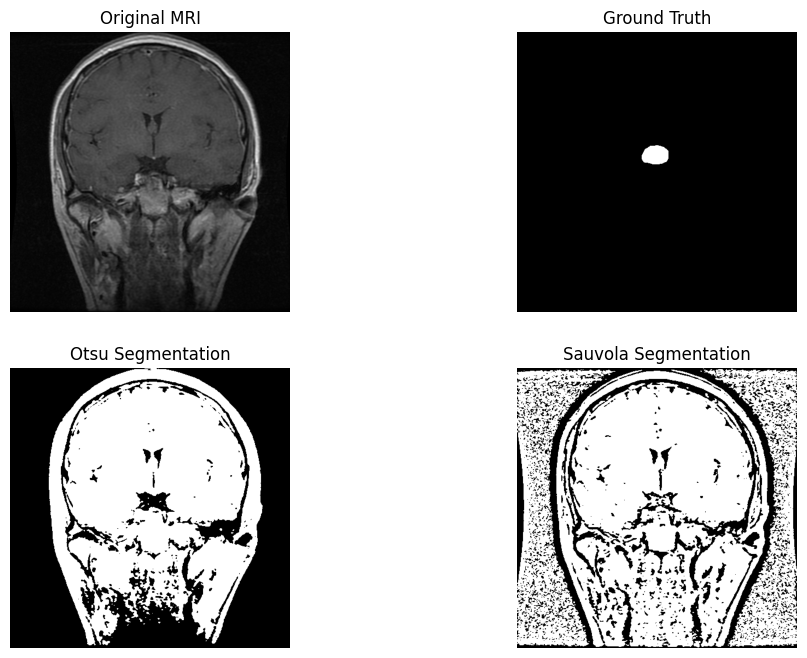

In [32]:
idx = 5  # change index to visualize different images

img = cv2.imread(os.path.join(image_dir, image_files[idx]), 0)
mask = cv2.imread(os.path.join(mask_dir, mask_files[idx]), 0)

img_float = img_as_float(img)
mask = (mask > 127).astype(np.uint8)

otsu_pred = otsu_segmentation(img_float)
sauvola_pred = sauvola_segmentation(img_float)

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title("Original MRI")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(2,2,2)
plt.title("Ground Truth")
plt.imshow(mask, cmap='gray')
plt.axis("off")

plt.subplot(2,2,3)
plt.title("Otsu Segmentation")
plt.imshow(otsu_pred, cmap='gray')
plt.axis("off")

plt.subplot(2,2,4)
plt.title("Sauvola Segmentation")
plt.imshow(sauvola_pred, cmap='gray')
plt.axis("off")

plt.show()
